In [1]:
import os
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Data Processing
<br>
For the input numpy array, I will load the input images from the Dataset folder and process them by resizing them so that each image is of the same size that is (128, 128) and after that I will divide them with 255 which is the max value a pixel can have and in doing so, these images will be normalized. <br>
For the output numpy array, I will add the labels for the corressponding images to the y array and after all the labels have been added, they will be hot encoded for easier processing.
<br>
<br>

In [2]:
dataset_folder = 'Dataset'
images = []

classes = ['with_mask', 'without_mask','mask_weared_incorrect']

X = []
labels = []

count = 0;

for _class in classes:
    image_folder = os.path.join(dataset_folder, _class)
    image_files = os.listdir(image_folder)
    for image in image_files:
        image_path = os.path.join(image_folder, image)
        image = Image.open(image_path)
        image = image.resize((224, 224))
        image = np.array(image)
        image = image/255.0
        X.append(image)
        labels.append(_class)
        
X = np.array(X)
labels = np.array(labels)

In [3]:
labels

array(['with_mask', 'with_mask', 'with_mask', ...,
       'mask_weared_incorrect', 'mask_weared_incorrect',
       'mask_weared_incorrect'], dtype='<U21')

In [4]:
# Hot encoding the labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
Y = tf.keras.utils.to_categorical(labels_encoded, num_classes = 3)

<br>
We can check the Class Labels assigned to our three classes

In [5]:
print(f'label for {labels[8000]}: {Y[8000]}')
print(f'label for {labels[0]}: {Y[0]}')
print(f'label for {labels[4000]}: {Y[4000]}')

label for mask_weared_incorrect: [1. 0. 0.]
label for with_mask: [0. 1. 0.]
label for without_mask: [0. 0. 1.]


In [6]:
label_list = ['mask_weared_incorrect', 'with_mask', 'without_mask']

In [7]:
# Verifying the shapes of the input images
print(f"Shape of input: {X.shape}")
print(f"Shape of output: {Y.shape}")

Shape of input: (8982, 224, 224, 3)
Shape of output: (8982, 3)


<br>
Let's take a look at some of the images at random from the dataset and their labels

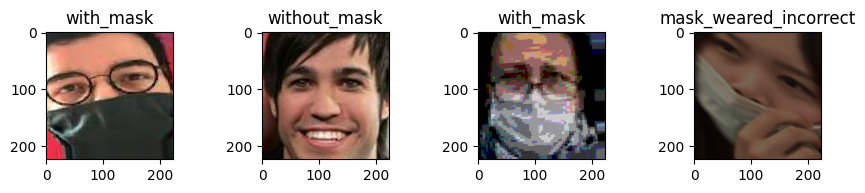

In [8]:
index = np.random.randint(0, 8982, 4)

plt.subplots(1, 4, figsize=(10, 5))
for i in range(0, 4):
    # index = random.randint(0, X.shape[0] - 1)
    plt.subplot(1, 4, i + 1)
    plt.imshow(X[index[i]])
    plt.title(labels[index[i]])
plt.subplots_adjust(wspace=0.7, hspace=0.4)
plt.show()

<br>
Now we will split the dataset into training and testing in order to train and then analyze the performance of our model 

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)

In [10]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of Y_train: {Y_train.shape}")

print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_test: {Y_test.shape}")

Shape of X_train: (7185, 224, 224, 3)
Shape of Y_train: (7185, 3)
Shape of X_test: (1797, 224, 224, 3)
Shape of Y_test: (1797, 3)


In [ ]:
# Saving the processed data
processed_data_dir = 'Processed Data'
os.makedirs(processed_data_dir, exist_ok=True)

np.save(os.path.join(processed_data_dir, 'X_train.npy'), X_train)
np.save(os.path.join(processed_data_dir, 'X_test.npy'), X_test)
np.save(os.path.join(processed_data_dir, 'Y_train.npy'), Y_train)
np.save(os.path.join(processed_data_dir, 'Y_test.npy'), Y_test)

We have successfully cleaned the data and have saved it for later use.